In [2]:
from pandas import read_csv
from matplotlib import pyplot

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

In [3]:
data = pd.read_csv('Pretreated data.csv', index_col=0, parse_dates=True)
data.head()

,Temp(degC),Air_temp(degC),Salinity(PSU),pH,DO(mg/l),precipitation(mm)
date,,,,,,
2020-01-01 00:00:00,25.619,27.762,34.046,8.3158,8.1548,0.00102
2020-01-01 00:05:00,25.623,27.810,34.084,8.3184,8.1587,0.00102
2020-01-01 00:10:00,25.625,27.819,34.105,8.3198,8.1589,0.00102
2020-01-01 00:15:00,25.623,27.768,34.098,8.3190,8.1536,0.00102
2020-01-01 00:20:00,25.619,27.686,34.084,8.3169,8.1450,0.00102


(0.0, 200.0)

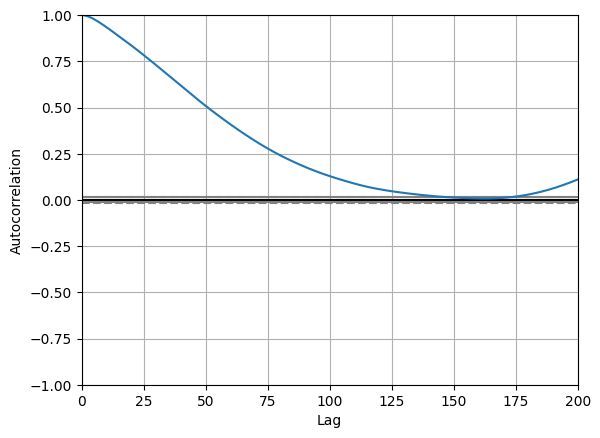

In [4]:
ph = data['pH']
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ph).set_xlim([0, 200])

In [5]:
ph.index = ph.index.to_period('5min')

In [6]:
model = ARIMA(ph, order=(25,1,0))
model_fit = model.fit()

/home/ubuntu/miniconda3/envs/duong/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     pH   No. Observations:                20000
Model:                ARIMA(25, 1, 0)   Log Likelihood               86142.587
Date:                Sat, 26 Oct 2024   AIC                        -172233.174
Time:                        05:57:17   BIC                        -172027.685
Sample:                    01-01-2020   HQIC                       -172165.945
                         - 03-10-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7716      0.004    208.675      0.000       0.764       0.779
ar.L2          0.0564      0.007      7.727      0.000       0.042       0.071
ar.L3          0.0267      0.008      3.320      0.0

In [8]:
from pandas import DataFrame

<Axes: xlabel='date'>

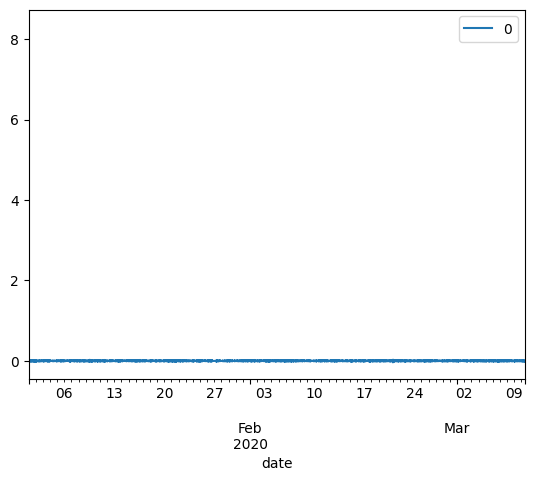

In [9]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
#plt.show()

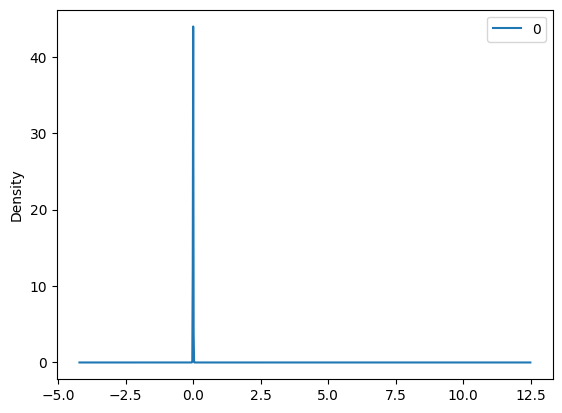

In [10]:
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals


In [11]:
print(residuals.describe())

                  0
count  20000.000000
mean       0.000415
std        0.058892
min       -0.034921
25%       -0.000995
50%       -0.000006
75%        0.000964
max        8.315800


In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
size = int(len(ph) * 0.985)
train, test = ph[0:size], ph[size:len(ph)]
history = [x for x in train]
predictions = list()

In [14]:
len(test)

300

In [16]:
for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('Iter =%d predicted=%f, expected=%f' % (t, yhat, obs))

Iter =0 predicted=8.317499, expected=8.317496
Iter =1 predicted=8.317494, expected=8.317498
Iter =2 predicted=8.317499, expected=8.326449
Iter =3 predicted=8.333386, expected=8.326275
Iter =4 predicted=8.326604, expected=8.326187
Iter =5 predicted=8.326321, expected=8.326144
Iter =6 predicted=8.325773, expected=8.326122
Iter =7 predicted=8.325901, expected=8.326111
Iter =8 predicted=8.326108, expected=8.326105
Iter =9 predicted=8.326104, expected=8.326103
Iter =10 predicted=8.326102, expected=8.326101
Iter =11 predicted=8.326101, expected=8.326102
Iter =12 predicted=8.326103, expected=8.326102
Iter =13 predicted=8.326103, expected=8.326103
Iter =14 predicted=8.326103, expected=8.326103
Iter =15 predicted=8.326103, expected=8.326103
Iter =16 predicted=8.326103, expected=8.326103
Iter =17 predicted=8.326103, expected=8.326103
Iter =18 predicted=8.326103, expected=8.326103
Iter =19 predicted=8.326103, expected=8.326103
Iter =20 predicted=8.326103, expected=8.329051
Iter =21 predicted=8.33

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [31]:
len(test),  len(predictions[2:])

(300, 300)

In [33]:
test[0], predictions[0]

(8.317496024, 8.31706681190591)

In [36]:
aligned_predictions = predictions[2:]

In [38]:
rmse = sqrt(mean_squared_error(test, aligned_predictions))
mae = mean_absolute_error(test, aligned_predictions)
mape = np.mean(np.abs((test - aligned_predictions) / test)) * 100

# Print metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Root Mean Squared Error (RMSE): 0.0033559373284219205
Mean Absolute Error (MAE): 0.001725203611136467
Mean Absolute Percentage Error (MAPE): 0.020760742735256216%


In [40]:

rmse = sqrt(mean_squared_error(test, aligned_predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.003


In [42]:
pyplot.rcParams['font.family'] = 'Times New Roman'

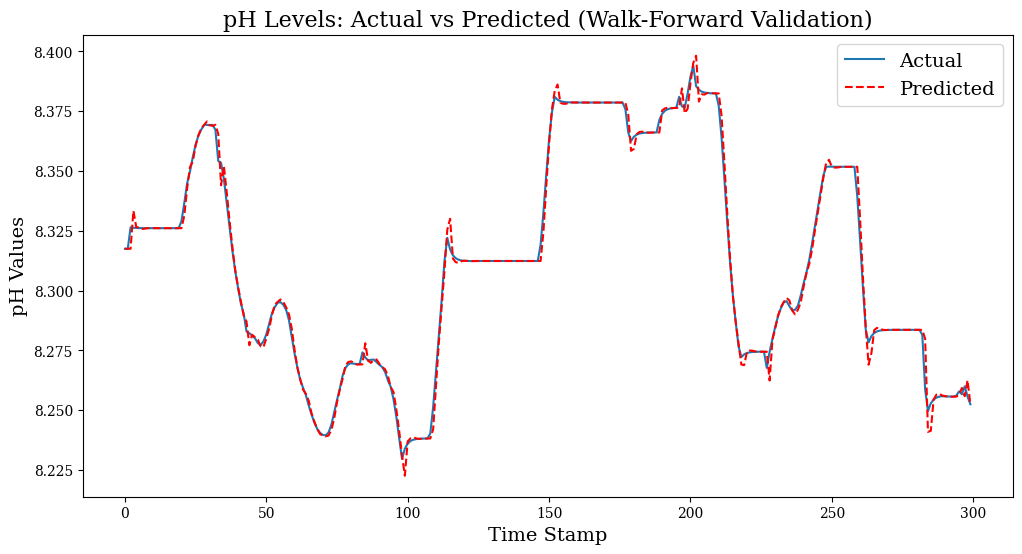

In [55]:
import matplotlib.pyplot as pyplot

# Set Times New Roman font globally
pyplot.rcParams['font.family'] = 'serif'

# Plot with Times New Roman font applied to all elements
pyplot.figure(figsize=(12, 6))
pyplot.plot(test.values, label='Actual')
pyplot.plot(aligned_predictions, color='red', label='Predicted', linestyle='--')

# Title and labels with Times New Roman font
# pyplot.title('pH Levels: Actual vs Predicted (Walk-Forward Validation)', 
#              fontsize=16, fontfamily='serif')
pyplot.xlabel('Time Stamp', fontsize=14, fontfamily='serif')
pyplot.ylabel('pH Values', fontsize=14, fontfamily='serif')

# Legend with Times New Roman font
pyplot.legend(prop={'family': 'serif', 'size': 14})


pyplot.savefig('ph_forecast.png', bbox_inches='tight')
# Display the plot
pyplot.show()